<a href="https://colab.research.google.com/github/Rabidhau/assessment0/blob/main/wps3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of MCP Neuron for AND and OR Function.

In [ ]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  state_neuron=[]
  for i in range(len(X1)):
       neuron_sum = X1[i] + X2[i]
       if neuron_sum >= T:
        state_neuron.append(1)
       else:
        state_neuron.append(0)
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

  return state_neuron

In [ ]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [ ]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    state_neuron=[]
    for i in range(len(X1)):
       neuron_sum = X1[i] + X2[i]
       if neuron_sum >= T:
        state_neuron.append(1)
       else:
        state_neuron.append(0)
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    return state_neuron


In [ ]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


**Question -1: What does the shape of X represent?**

 X shape represent dimesnion of feature matrix.

**Question - 2: What does the shape of Y represent?**

Y shape represent dimension of target/label matrix.

### Viewing the Dataset.

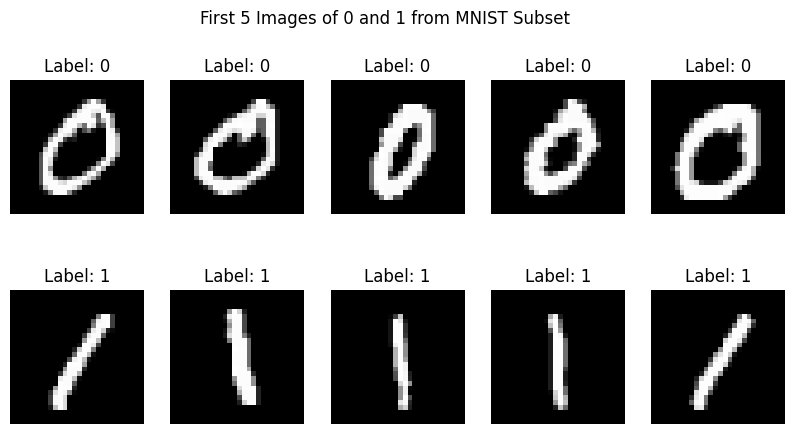

In [ ]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

**Question - 3: What does the weights array represent in this context?**

In this cpntext, the weights array represents the importance of each feature (pixel) in making the classification decision.



*** Question - 4: Why are we initializing the weights to zero? What effect could this have on the training process?***

At the beginning, the Perceptron has no prior knowledge, so all weights are set to 0.0 to start learning from scratch.
This ensures that weight updates are purely based on training data.

## Step - 3 - Make a Decision function:

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all=1/(1+np.exp(-predictions))
    return y_pred_all

**Question - 5: What is the purpose of the output = np.dot(X[i], weights) + bias line?**

The purpose of the output is to act as input to compute the activation function and predict class.


**Question - 6: What happens when the prediction is wrong? How are the weights and bias updated?**

When the prediction is wrong, weoght and bias are updated .The weights and bias are updated by:

error = y[i] - prediction

weights += learning_rate * error * X[i]

bias += learning_rate * error

## Step - 3 - Implement the Perceptron Learning Algorithm

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """
    n_samples, n_features = X.shape

    for epoch in range(1, epochs + 1):
        correct_predictions = 0

        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + bias
            prediction = 1 if linear_output >= 0 else 0

            if prediction == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias
                error = y[i] - prediction
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        accuracy = correct_predictions / n_samples

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")

    return weights, bias, accuracy


## Training the Perceptron

In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10: Accuracy = 0.9992
Epoch 20: Accuracy = 1.0000
Epoch 30: Accuracy = 1.0000
Epoch 40: Accuracy = 1.0000
Epoch 50: Accuracy = 1.0000
Epoch 60: Accuracy = 1.0000
Epoch 70: Accuracy = 1.0000
Epoch 80: Accuracy = 1.0000
Epoch 90: Accuracy = 1.0000
Epoch 100: Accuracy = 1.0000
The Final Accuracy is:  1.0


**Question - 7:Why is the final accuracy important, and what do you expect it to be?**

Final accuracy is important as it determines how much correct prediction is,means it measures the performance of the Perceptron. As, 0 and 1 are linealy seperable I expect it to be near to 1.00.

## Step 5: Visualize Misclassified Images

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


**Question - 8:What does misclassified idx store, and how is it used in this code?**

misclassified_idx is a NumPy array used in the code to store the indices of all misclassified images in the dataset up to 10 misclassified samples.These are the positions where the predicted label (y_pred) does not match the true label (y).




***Question - 9: How do you interpret the result if the output is ”All images were correctly classified!”? ***

If the output is"All images were correctly classified!", it means that the Perceptron model made no mistakes in classifying the data and that might mean the data is linearly seperable as perceptron works best with it.

# **Task 3: Perceptron Algorithm for 3 vs 5 Classification.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv("/content/mnist_3_and_5.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df.drop(columns=["label"]).values  # 784 pixels
y = df["label"].values  # Labels (3 or 5)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (2741, 784)
Label vector shape: (2741,)


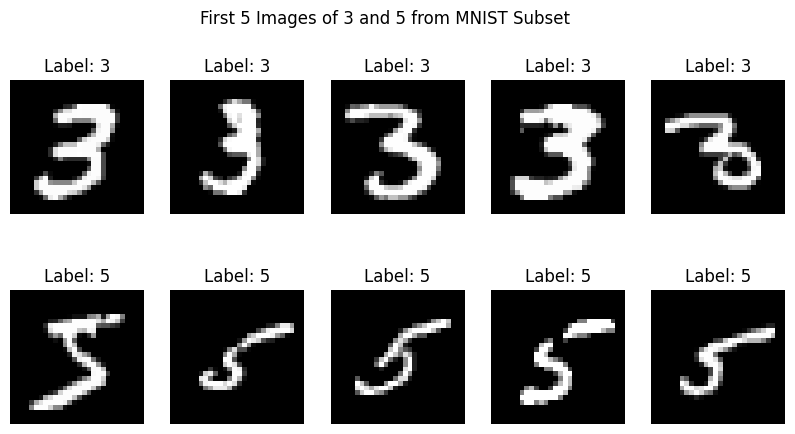

In [ ]:
# Separate images for label 3 and label 5
images_3 = X[y == 3]  # Get all images with label 3
images_5 = X[y == 5]  # Get all images with label 5

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_3) < 5 or len(images_5) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 3
        axes[0, i].imshow(images_3[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 3")
        axes[0, i].axis("off")
        # Plot digit 5
        axes[1, i].imshow(images_5[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 5")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 3 and 5 from MNIST Subset")
    plt.show()

In [ ]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

In [ ]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    y_pred_all=1/(1+np.exp(-predictions))
    return y_pred_all

In [ ]:
import numpy as np

def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Final accuracy after training
    """
    n_samples, n_features = X.shape

    for epoch in range(1, epochs + 1):
        correct_predictions = 0

        for i in range(n_samples):
            linear_output = np.dot(X[i], weights) + bias
            prediction = 1 if linear_output >= 0 else 0

            if prediction == y[i]:
                correct_predictions += 1
            else:
                # Update weights and bias
                error = y[i] - prediction
                weights += learning_rate * error * X[i]
                bias += learning_rate * error

        accuracy = correct_predictions / n_samples

        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Accuracy = {accuracy:.4f}")

    return weights, bias, accuracy


In [ ]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

Epoch 10: Accuracy = 0.0000
Epoch 20: Accuracy = 0.0000
Epoch 30: Accuracy = 0.0000
Epoch 40: Accuracy = 0.0000
Epoch 50: Accuracy = 0.0000
Epoch 60: Accuracy = 0.0000
Epoch 70: Accuracy = 0.0000
Epoch 80: Accuracy = 0.0000
Epoch 90: Accuracy = 0.0000
Epoch 100: Accuracy = 0.0000
The Final Accuracy is:  0.0


Final Accuracy: 0.0000


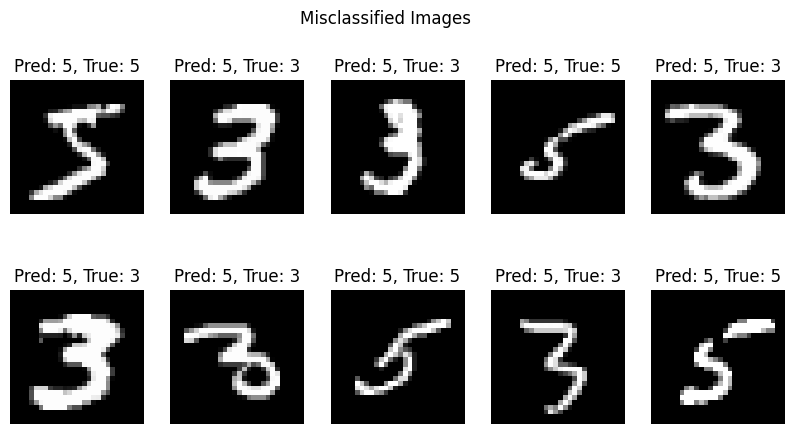

In [ ]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {3 if y_pred[idx] == 0 else 5}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")